<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout2_UnexplainedVariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #2 : Unexplained Variation


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 2.1

Consider the following data that has been collected from students in my introductory statistics course over several past semesters.  

<table>
  <tr>
    <td width='30%' valign='top'>
      <ul>
        <li><strong>Response Variable</strong>: Hair Length (mm)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Gender</li>
          <li>Height (inches)</li>
         </ul>
    </ul>
    </td>
    <td width='70%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1h4lXsxXMRHVRtdg48vdbMbGahWfGz_oS" width='50%' height='50%'></img></p>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1W1F3yLFTI-AOUOg10Gnl7zsetSX-6lXz" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [29]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [30]:
#@title Readin Data

# Reading data in using read.csv via Base 
HairLength <- read_csv("http://www.StatsClass.org/stat360/Datasets/HairLength.csv")

Rows: 131 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Gender, Name
dbl (3): RowID, Height, Length


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The **head()** function can be used to see the first few lines of the dataset.  Similarly, the tail() function can be used to see the last few lines of a dataset.

In [31]:
#@title View the first few rows of data
head(HairLength)

RowID,Gender,Name,Height,Length
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,F,Kelsie,66,359
2,M,Eric,73,50
3,F,Susan,66,295
4,F,Alesha,72,320
5,F,Alexa,70,470
6,F,Jackie,62,180


## Marginal Distribution

In [32]:
#@title Summarize only the response variable
#using select to specify only a single column
(HairLength 
  %>% select(Length)
  %>% summary()
)

     Length     
 Min.   : 12.0  
 1st Qu.: 60.0  
 Median :248.0  
 Mean   :237.3  
 3rd Qu.:380.0  
 Max.   :578.0  

In [33]:
#@title Getting several statistics

(HairLength 
  %>% summarize(
                  Mean = mean(Length),
                  'Standard Devation' = sd(Length),
                  Variance = var(Length),
                  Count = n(),
               )
  %>% mutate(CorrectedSS = Variance * (Count-1))
)

Mean,Standard Devation,Variance,Count,CorrectedSS
<dbl>,<dbl>,<dbl>,<int>,<dbl>
237.2595,171.7999,29515.19,131,3836975


**Note**:  The total unexplained variation in the *marginal* distribution is given by the Corrected Sum of Squares value. 

$$
\begin{array}{rcl}
  \mbox{Corrected SS} & = & \mbox{Variance} * (n-1) \\
    & = & 29515.9 * (131-1) \\
    & = & 3836975 \\
\end{array}
$$

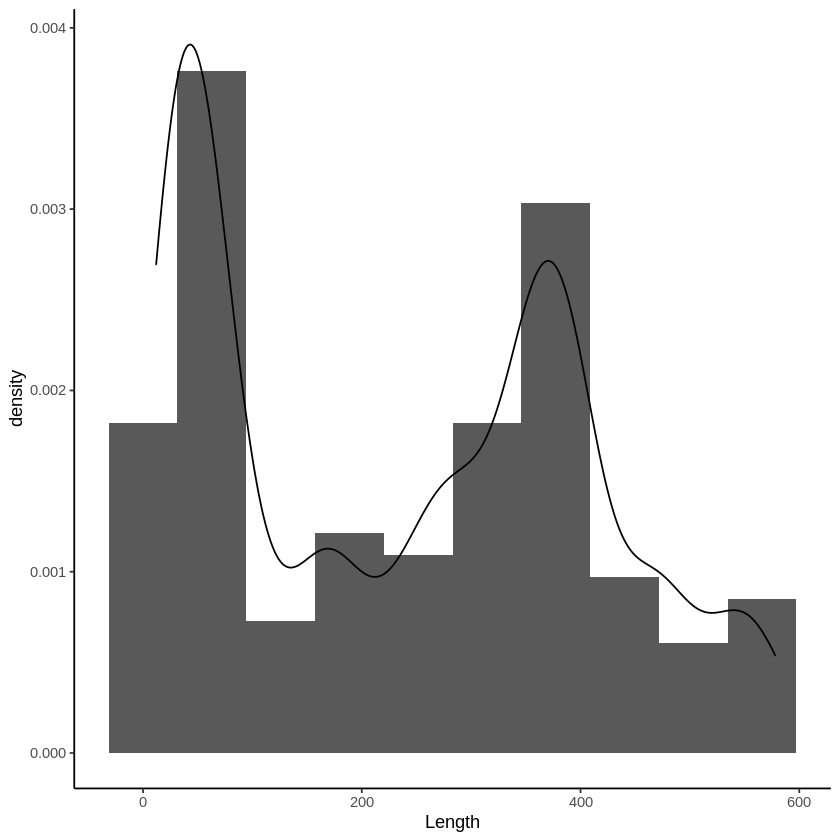

In [34]:
#@title Empirical Density Function
ggplot(data=HairLength, aes(x=Length)) + 
  geom_histogram(aes(y=..density..), bins=10) + 
  geom_density(adjust=.5) +
  theme_classic()

## Conditional Distributions

In [35]:
#@title Getting several statistics
(HairLength 
  %>% group_by(Gender)
  %>% summarize(
                  Mean = mean(Length),
                  Variance = var(Length),
                  Count = n(),
               )
  %>% mutate(CorrectedSS = Variance * (Count-1))
)

Gender,Mean,Variance,Count,CorrectedSS
<chr>,<dbl>,<dbl>,<int>,<dbl>
F,346.74390,14171.181,82,1147865.62
M,54.04082,1277.165,49,61303.92


**Note**:  The total unexplained variation in the *conditional* distributions can be computed by adding the Corrected Sum of Squares values across the conditional distributions.

$$
\begin{array}{rcl}
  \mbox{Corrected SS} & = & \big( \mbox{Variance}_F * (n_F-1) \big) + \big( \mbox{Variance}_M * (n_M-1) \big) \\
    & = & \big( 14171.181 * (82-1) \big) + \big( 1277.165 * (49-1) \\
    & = & 1147866  +  61304 \\
    & = & 1209170
\end{array}
$$

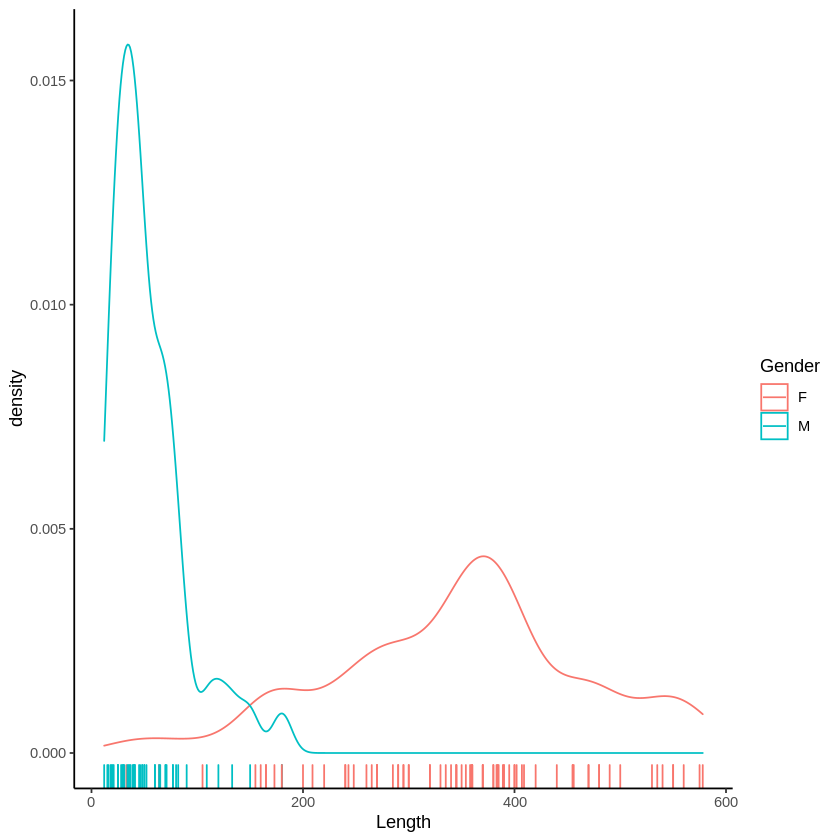

In [36]:
#@title EDF By Projectile Type
ggplot(data=HairLength, aes(x=Length, color=Gender)) + 
  geom_rug() + 
  geom_density(adjust=0.75) +
  theme_classic()

## Proportion of Variation than can be Explained

The proportion of unexplained variation taken away by considering the conditional distributions is typically used as a measure of overall usefulness of the conditioning variable(s).  This proportion is commonly referred to as the **coefficient of determination** or **$R^{2}$**.


$$
R^2 = \frac{\mbox{Total Unexplained in Marginal Distribution}-\mbox{Total Unexplained in Conditional Distributions}}{\mbox{Total Unexplained in Marginal Distribution}}
$$

The numerator of of $R^2$ is simply the amount of variation that *can* be explained by conditioning.  Thus, $R^2$ is often expressed as

$$
R^2 = \frac{\mbox{Variation that can be Explained by Conditioning}}{\mbox{Total Unexplained in Marginal Distribution}}
$$



$$
\begin{array}{rcl}
R^2 & = & \frac{3836975-1209170}{3836975} \\
    & = & \frac{2627805}{3836975} \\
    & = & 0.6849 \\
\end{array}
$$

<u>Interpretation</u>:  About 70\% of the total variation in Hair Length can be explained by considering the Gender of the individual.

<table width='100%'><tr><td bgcolor="orange"><font size="+2">Task</font></td></tr></table>

### Questions

For this task, consider again the Impact Crater dataset.

1.   What is the total amount of unexplained variation in Diameter?
2.   What is the total amount of unexplained variation in Diameter when conditioning on SandType?
3.   What is the total amount of unexplained variation in Diameter when conditioning on ProjectileType?
4.   Compute the appropirate $R^2$ measure when conditioning on SandType.  Next, compute the appropirate $R^2$ measure when conditioning on ProjectileType.
5. Based on the $R^2$ calculations, which variable (SandType or ProjectileType) does a better job of explaining the variation in Diameter?  Discuss.



<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

End of Document